# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
heart_disease = pd.read_csv("Data/Scikit-Learn/heart-disease.csv")

In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (features matrix)
x = heart_disease.drop("target",axis=1)

# Create y (labels)
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
len(heart_disease), len(x_test),len(x_train)

(303, 61, 242)

In [8]:
# make a prediction
y_label = clf.predict(np.array([63,1,3,145,233,1,0,150,0,2.3,0,0,1]))

ValueError: Expected 2D array, got 1D array instead:
array=[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
   1. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_preds = clf.predict(x_test)
y_preds

In [ ]:
y_test

In [ ]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

In [ ]:
confusion_matrix(y_test,y_preds)

In [ ]:
accuracy_score(y_test,y_preds)

In [ ]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

In [ ]:
# 6. Save a model and load it
import pickle

pickle.dump(clf,open("Data/Scikit-Learn/random_forst_model_1.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("Data/Scikit-Learn/random_forst_model_1.pkl", "rb"))
loaded_model.score(x_test,y_test)

#  1. Getting the data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)
   

In [ ]:
heart_disease.head()


In [ ]:
x

In [ ]:
y

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size=0.2
)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

### 1.1 Make sure it's all numerical¶





In [ ]:
car_sales = pd.read_csv("Data/Scikit-Learn/car-sales-extended.csv")

In [ ]:
car_sales.head()

In [ ]:
 len(car_sales)

In [ ]:
car_sales.dtypes

In [ ]:
# Split into X/y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]


# Split into training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
x.head()

In [ ]:
car_sales["Doors"].value_counts()

In [ ]:
car_sales["Make"].value_counts()

In [ ]:
car_sales["Colour"].value_counts()

So Colour, Make and Doors are categorical columns 

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [
        (
            "one_hot",
            one_hot,
            categorical_features
        )
    ],
    remainder="passthrough"
)

transformed_X = transformer.fit_transform(x)

In [ ]:
transformed_X

In [ ]:
x.head()

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
# Another way to do it with pd.dummies...
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# Let's refit the model
x_train,x_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(x_train,y_train)

In [ ]:
x.head()

In [ ]:
model.score(x_test,y_test)

## 1.2 What if there were missing values

    1. Fill them with some value (also known as imputation).
    2. Remove the samples with missing data altogether.


In [ ]:
# Import car sales missing data
car_sale_miss = pd.read_csv("Data/Scikit-Learn/car-sales-extended-missing-data.csv")
car_sale_miss

In [ ]:
car_sale_miss.isna().sum()

In [ ]:
# Create X & y
x = car_sale_miss.drop("Price", axis=1)
y = car_sale_miss["Price"]

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [
        (
            "one_hot",
            one_hot,
            categorical_features
        )
    ],
    remainder="passthrough"
)
transformed_X = transformer.fit_transform(x)

In [ ]:
car_sale_miss["Doors"].value_counts()

#### Option 1: Fill missing data with Pandas


In [ ]:
# Fill the "Make" column
car_sale_miss["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column
car_sale_miss["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM)" column
car_sale_miss["Odometer (KM)"].fillna(car_sale_miss["Odometer (KM)"].mean(),inplace=True)


# Fill the "Doors" column
car_sale_miss["Doors"].fillna(4, inplace=True)


In [ ]:
car_sale_miss

In [ ]:
# Check our dataframe again
car_sale_miss.isna().sum()

In [ ]:
# Remove rows with missing Price value
car_sale_miss.dropna(inplace=True)

In [ ]:
# Check our dataframe again
car_sale_miss.isna().sum()

In [ ]:
len(car_sale_miss)

In [ ]:
x = car_sale_miss.drop("Price", axis=1)
y = car_sale_miss["Price"]

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sale_miss)
transformed_X

#### Option 2: Filling missing data and transforming categorical data with Scikit-Learn

The main takeaways:

   * Split your data first (into train/test)
   * Fill/transform the training set and test sets separately


In [ ]:
# Import car sales missing data
car_sale_miss = pd.read_csv("Data/Scikit-Learn/car-sales-extended-missing-data.csv")
car_sale_miss

In [ ]:
car_sale_miss.isna().sum()

In [ ]:
# Drop the rows with no labels
car_sale_miss.dropna(subset=["Price"],inplace=True)
car_sale_miss.isna().sum()

In [ ]:
len(car_sale_miss)

In [ ]:
# Create X & y
x = car_sale_miss.drop("Price", axis=1)
y = car_sale_miss["Price"]


# Split data into train and test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [ ]:
# Check missing values
x.isna().sum()

In [ ]:
x_train

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")


# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]


# Create an imputer (something that fills missing data)
imputer = ColumnTransformer(
    [
        ("cat_imputer",cat_imputer,cat_features),
        ("door_imputer",door_imputer,door_feature),
        ("num_imputer",num_imputer,num_features)
    ]
)

# Fill train and test values separately
filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.transform(x_test)

In [ ]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_x_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_x_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()


In [ ]:
# Check to see the original... still missing values
car_sale_miss.isna().sum()

In [ ]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

In [ ]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed()
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()


# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)


In [ ]:

# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

Note: The 50 less values in the transformed data is because we dropped the rows (50 total) with missing values in the Price column.

# 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

   * Classification - predicting whether a sample is one thing or another
   * Regression - predicting a number


   * Step 1 - Check the Scikit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
 

## 2.1 Picking a machine learning model for a regression problem


In [14]:
# Import Boston housing dataset
from sklearn.datasets import load_boston

boston = load_boston()
boston;

In [15]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
# How many samples?
len(boston_df)

506

###### Let's try the Ridge Regression model


In [17]:
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate Ridge model
model = Ridge()
model.fit(x_train,y_train);


# Check the score of the Ridge model on test data
model.score(x_test,y_test)

0.6662221670168522

How do we improve this score?

What if Ridge wasn't working?

Let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [18]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Ridge model
model = RandomForestRegressor()
model.fit(x_train,y_train);


# Check the score of the Ridge model on test data
model.score(x_test,y_test)

0.873969014117403

## 2.2 Choosing an estimator for a classification problem


Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [19]:
heart_disease = pd.read_csv("Data/Scikit-Learn/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC.

In [21]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)


# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)


/home/hatadmin/Documents/ML/sample_project/env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8688524590163934

In [22]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [23]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier


# Setup random seed
np.random.seed(42)


# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

0.8524590163934426

Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

# 3. Fit the model/algorithm on our data and use it to make predictions

## 3.1 Fitting the model to the data

Different names for:

* X = features, features variables, data
* y = labels, targets, target variables

In [54]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier


# Setup random seed
np.random.seed(42)


# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

0.8524590163934426

In [55]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Random Forest model deep dive
These resources will help you understand what's happening inside the Random Forest models we've been using.

* Random Forest Wikipedia
* Random Forest Wikipedia (simple version)
* Random Forests in Python by yhat
* An Implementation and Explanation of the Random Forest in Python by Will Koehrsen

## 3.2 Make predictions using a machine learning model

2 ways to make predictions:

1. predict()
2. predict_proba()

In [56]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [57]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [58]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [59]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [60]:
# Compare predictions to truth labels to evaluate the model
y_predic = clf.predict(x_test)
np.mean(y_predic == y_test)

0.8524590163934426

In [61]:
clf.score(x_test,y_test)

0.8524590163934426

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predic)

0.8524590163934426

Make predictions with predict_proba() - use this if someone asks you "what's the probability your model is assigning to each prediction?"

In [63]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [64]:
# Let's predict() on the same data...
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

predict() can also be used for regression models.

In [65]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)


# Make predictions
y_preds = model.predict(X_test)



In [67]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [68]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [69]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

2.1226372549019623

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/esitmators:

1. Estimator score method
2. The scoring parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with the score method

In [70]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier


# Setup random seed
np.random.seed(42)


# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

0.8524590163934426

In [71]:
clf.score(x_train,y_train)

1.0

In [72]:
clf.score(x_test,y_test)

0.8524590163934426


Let's do the same but for regression..

In [73]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Ridge model
model = RandomForestRegressor()
model.fit(x_train,y_train);



In [74]:
model.score(x_test,y_test)

0.873969014117403

### 4.2 Evaluating a model using the scoring parameter

In [77]:
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier


# Setup random seed
np.random.seed(42)


# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
clf.score(x_test, y_test)

0.8524590163934426

In [80]:
cross_val_score(clf,x,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [81]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [86]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test,y_test)


# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Default scoring parameter of classifier = mean accuracy
`clf.score()`

In [88]:
# Scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [90]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
from sklearn.model_selection  import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, x, y, cv=5)
clf_cross_val_score

0.8248087431693989

In [92]:
np.mean(clf_cross_val_score)

0.8248087431693989

In [95]:

print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve


ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [96]:
# Create X_test... etc
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [98]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train,y_train)


# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)


(array([[0.58, 0.42],
        [0.09, 0.91],
        [0.55, 0.45],
        [0.75, 0.25],
        [0.52, 0.48],
        [0.09, 0.91],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.14, 0.86],
        [0.39, 0.61]]),
 61)

In [102]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:5]

array([0.42, 0.91, 0.45, 0.25, 0.48])

In [105]:
clf.predict(x_test)[:5]

array([0, 1, 0, 0, 0])

In [106]:
y_test[:5]

110    1
40     1
31     1
101    1
86     1
Name: target, dtype: int64

In [110]:
# Caculate fpr, tpr and thresholds
fpr, tpr, threshold= roc_curve(y_test,y_probs_positive)

# Caculate fpr, tpr and thresholds
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

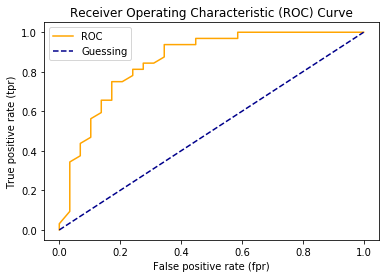

In [118]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    # Plot roc curve
    plt.plot(fpr,tpr,
             color="orange",
             label="ROC"
            )
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue", 
             linestyle="--",
             label="Guessing"
            )
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [120]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8561422413793104

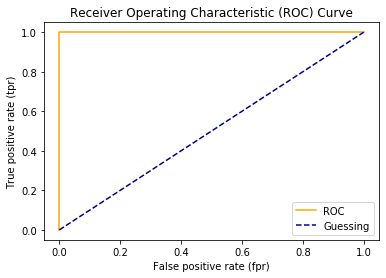

In [119]:
# Plot perfect ROC curve and AUC score
fpr, tpr, threshold= roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [121]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.



In [123]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 8, 24]])

In [124]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(
    y_test,
    y_preds,
    rownames=["Actual Labels"],
    colnames=["Predicted Labels"]
)

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,8,24


In [125]:
# How install a conda package into the current envrionment from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/hatadmin/Documents/ML/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_1         157 KB
    seaborn-0.10.0             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:         320 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.0-py_0

The following packages will be UPDATED:

  certifi                                 2019.11.28-py36_0 --> 2019.11.28-py36_1



seaborn-0.10.0       

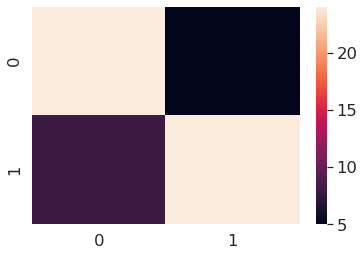

In [129]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

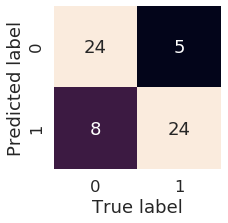

In [130]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax  = sns.heatmap(
        conf_mat,
        annot=True, #Annotate the boxes with conf_mat info
        cbar=False
    )
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
    
plot_conf_mat(conf_mat)    
    